## Loading and Exploring Monthly and Yearly Datasets
In this section, we load the monthly and yearly housing datasets for London and display the first few rows of each dataset to understand their structure and contents.
# Importing necessary libraries
import pandas as pd


In [110]:
# Importing necessary libraries
import pandas as pd


### Importing Necessary Libraries
We import Pandas, which is essential for loading and manipulating the datasets.


In [111]:
# Load the datasets
monthly = pd.read_csv('london_monthly_filtered.csv')
yearly = pd.read_csv('london_yearly_filtered.csv')


### Loading the Monthly and Yearly Datasets
We load two datasets: `london_monthly_filtered.csv`, which contains monthly housing data, and `london_yearly_filtered.csv`, which contains yearly housing data. These datasets will be used for further analysis.


In [112]:
# Display the first few rows of both datasets
monthly_head = monthly.head()
yearly_head = yearly.head()

monthly_head, yearly_head


(         date            area  average_price       code  houses_sold  \
 0  01/01/1995  city of london          91449  E09000001         17.0   
 1  01/02/1995  city of london          82203  E09000001          7.0   
 2  01/03/1995  city of london          79121  E09000001         14.0   
 3  01/04/1995  city of london          77101  E09000001          7.0   
 4  01/05/1995  city of london          84409  E09000001         10.0   
 
    no_of_crimes  borough_flag  
 0           NaN             1  
 1           NaN             1  
 2           NaN             1  
 3           NaN             1  
 4           NaN             1  ,
         code                  area        date  median_salary  \
 0  E09000001        city of london  01/12/1999        33020.0   
 1  E09000002  barking and dagenham  01/12/1999        21480.0   
 2  E09000003                barnet  01/12/1999        19568.0   
 3  E09000004                bexley  01/12/1999        18621.0   
 4  E09000005                 b

### Displaying the First Few Rows of Each Dataset
We display the first few rows of the `monthly` and `yearly` datasets to inspect the data structure and the types of information contained within each dataset.


## Processing Monthly Dataset
In this section, we convert the `date` column in the monthly dataset to datetime format, check for missing values, and generate summary statistics.


In [113]:
# Convert date to datetime format
monthly['date'] = pd.to_datetime(monthly['date'], format='%d/%m/%Y')


### Converting Date to Datetime Format
We convert the `date` column in the `monthly` dataset from string format to datetime format using the `pd.to_datetime` function. This step is essential for time series analysis and ensures that the date is correctly interpreted by Pandas.


In [114]:
# Check for missing values in the monthly dataset
missing_values_monthly = monthly.isnull().sum()


### Checking for Missing Values
We check for missing values in the `monthly` dataset to identify any gaps in the data. The `isnull().sum()` function counts the number of missing values in each column.


In [115]:
# Generate summary statistics for the monthly dataset
summary_stats_monthly = monthly.describe()


### Generating Summary Statistics
We generate summary statistics for the `monthly` dataset using the `describe()` function. This provides a statistical overview of the dataset, including measures such as mean, standard deviation, and percentiles.


In [116]:
# Display the results: missing values and summary statistics
missing_values_monthly, summary_stats_monthly


(date                0
 area                0
 average_price       0
 code                0
 houses_sold        69
 no_of_crimes     2497
 borough_flag        0
 dtype: int64,
        average_price  houses_sold  no_of_crimes  borough_flag
 count   9.936000e+03  9867.000000   7439.000000        9936.0
 mean    2.966980e+05   317.304145   2158.352063           1.0
 std     1.992235e+05   145.175810    902.087742           0.0
 min     5.046000e+04     2.000000      0.000000           1.0
 25%     1.638288e+05   217.000000   1623.000000           1.0
 50%     2.522520e+05   300.000000   2132.000000           1.0
 75%     3.811525e+05   404.500000   2582.000000           1.0
 max     1.463378e+06  1073.000000   7461.000000           1.0)

### Displaying Missing Values and Summary Statistics
We display the missing values and summary statistics for the `monthly` dataset. This information is crucial for understanding the completeness and distribution of the data.


## Visualizing Distributions of Average Price and Houses Sold
In this section, we create histograms to visualize the distribution of `average_price` and `houses_sold` in the `monthly` dataset.


In [117]:
# Importing necessary libraries
import matplotlib.pyplot as plt


### Importing Necessary Libraries
We import Matplotlib's `pyplot` module to create visualizations of the distribution of `average_price` and `houses_sold`.


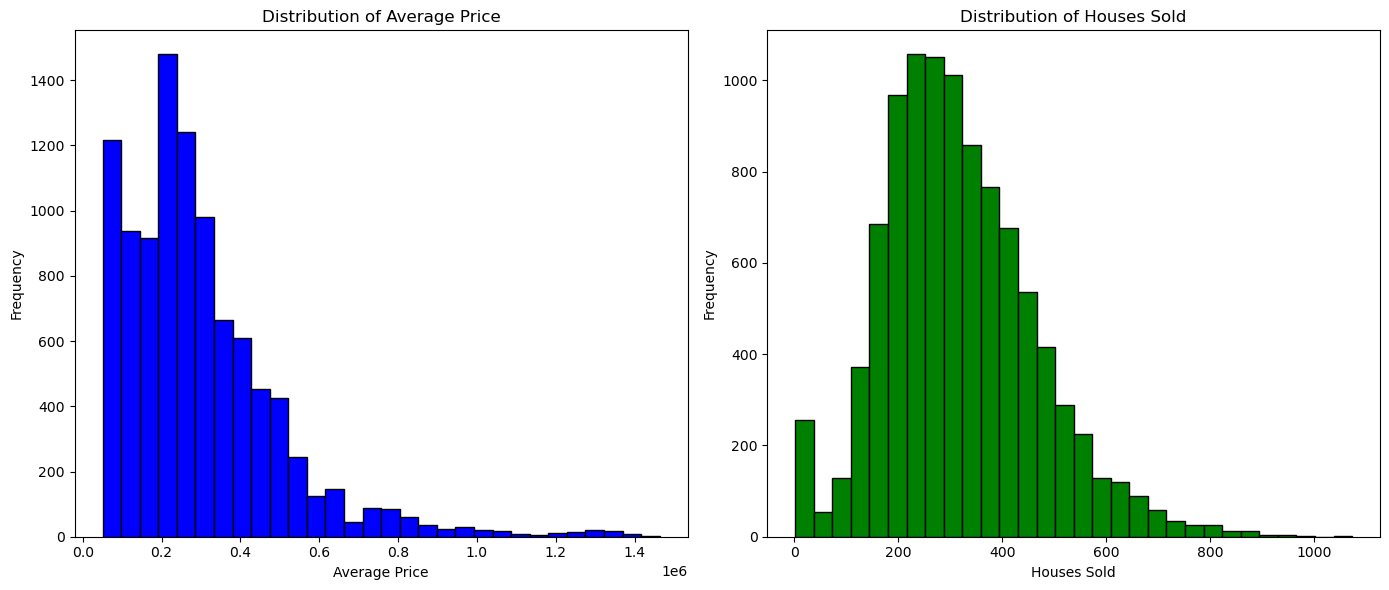

In [118]:
# Creating subplots for the distributions
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plotting the distribution of average price
ax[0].hist(monthly['average_price'].dropna(), bins=30, color='blue', edgecolor='black')
ax[0].set_title('Distribution of Average Price')
ax[0].set_xlabel('Average Price')
ax[0].set_ylabel('Frequency')

# Plotting the distribution of houses sold
ax[1].hist(monthly['houses_sold'].dropna(), bins=30, color='green', edgecolor='black')
ax[1].set_title('Distribution of Houses Sold')
ax[1].set_xlabel('Houses Sold')
ax[1].set_ylabel('Frequency')

# Adjusting layout for better spacing
plt.tight_layout()


### Plotting Distributions of Average Price and Houses Sold
We create two histograms to visualize the distribution of `average_price` and `houses_sold` in the `monthly` dataset. The histograms help us understand the frequency distribution of these key variables. We also use `tight_layout()` to ensure that the subplots are properly spaced and aligned.


## Cleaning the Monthly Dataset
In this section, we clean the `monthly` dataset by converting the `date` column to datetime format, filling missing values, removing duplicates, and handling missing values in `houses_sold` using the median values grouped by `area`.


In [119]:
missing_values_yearly = yearly.isnull().sum()
summary_stats_yearly = yearly.describe()
missing_values_yearly, summary_stats_yearly

(code                   0
 area                   0
 date                   0
 median_salary         10
 life_satisfaction    437
 mean_salary            0
 recycling_pct         33
 population_size       33
 number_of_jobs        66
 area_size             99
 no_of_houses          99
 borough_flag           0
 dtype: int64,
        median_salary  life_satisfaction  population_size  number_of_jobs  \
 count     683.000000         256.000000       660.000000      627.000000   
 mean    29615.986823           7.441367    241221.965152   153877.192982   
 std      6537.183924           0.199623     68386.326823   121971.933763   
 min     15684.000000           7.000000      6581.000000    47000.000000   
 25%     25801.000000           7.310000    200953.250000    83000.000000   
 50%     29116.000000           7.455000    244366.000000   123000.000000   
 75%     32248.500000           7.570000    286963.250000   159000.000000   
 max     61636.000000           7.960000    392140.000000

In [120]:
# Convert the 'date' column to datetime format
monthly['date'] = pd.to_datetime(monthly['date'], format='%d/%m/%Y')


### Converting the Date Column to Datetime Format
We convert the `date` column from string format to datetime format using the `pd.to_datetime` function. This conversion is crucial for any time series analysis or operations based on the date.


In [121]:
# Fill missing values in 'no_of_crimes' with 0
monthly['no_of_crimes'] = monthly['no_of_crimes'].fillna(0)


### Filling Missing Values in 'no_of_crimes'
Missing values in the `no_of_crimes` column are filled with 0, assuming that missing data indicates no crimes reported for those entries.


In [122]:
# Remove any duplicate rows
monthly = monthly.drop_duplicates()


### Removing Duplicate Rows
We remove any duplicate rows in the `monthly` dataset to ensure data integrity. Duplicate rows can skew analysis and lead to incorrect conclusions.


In [123]:
# Group by 'area' and calculate the median 'houses_sold'
grouped_data = monthly.groupby(['area'])['houses_sold'].transform('median')

# Use this grouped median to fill missing values in 'houses_sold'
monthly['houses_sold'] = monthly['houses_sold'].fillna(grouped_data)


### Handling Missing Values in 'houses_sold'
We handle missing values in the `houses_sold` column by filling them with the median value of `houses_sold` for the corresponding `area`. This approach preserves the local context of housing sales when imputing missing data.


In [124]:
# Optionally, check if there are still any missing values left
print(monthly.isnull().sum())


date             0
area             0
average_price    0
code             0
houses_sold      0
no_of_crimes     0
borough_flag     0
dtype: int64


### Checking for Remaining Missing Values
We check for any remaining missing values in the `monthly` dataset after performing the data cleaning steps. This final check ensures that all necessary cleaning operations have been completed.


In [125]:
'''
# Save the cleaned dataset
monthly.to_csv('miss_filled_monthly.csv', index=False)
'''


"\n# Save the cleaned dataset\nmonthly.to_csv('miss_filled_monthly.csv', index=False)\n"

## Cleaning the Yearly Dataset
In this section, we clean the `yearly` dataset by converting relevant columns to numeric types, handling missing values using group-based and overall statistics, and addressing special characters in the `mean_salary` column.


In [126]:
# Importing necessary libraries
import numpy as np
import pandas as pd


### Importing Necessary Libraries
We import NumPy for handling special characters and performing numerical operations, and Pandas for data manipulation.


In [127]:
# Convert 'median_salary' to numeric, treating non-numeric entries (blanks included) as NaN
yearly['median_salary'] = pd.to_numeric(yearly['median_salary'], errors='coerce')


### Converting 'median_salary' to Numeric
We convert the `median_salary` column to a numeric format, treating non-numeric entries (including blanks) as NaN. This conversion is necessary for accurate numerical analysis and handling missing values.


In [128]:
# Group by 'area' and calculate the median, then use it to fill NaN values in each group
yearly['median_salary'] = yearly.groupby(['area'])['median_salary'].transform(lambda x: x.fillna(x.median()))


### Filling Missing Values in 'median_salary' by Group
We fill missing values in the `median_salary` column using the median salary within each `area`. This method preserves the local context and ensures that the filled values are representative of the specific area.


In [129]:
# Fill remaining NaNs with the overall median of the column
overall_median = yearly['median_salary'].median()
yearly['median_salary'].fillna(overall_median, inplace=True)


### Filling Remaining NaNs with Overall Median
After group-based imputation, we fill any remaining NaN values in `median_salary` with the overall median of the column. This step addresses cases where all values within a group were NaN.


In [130]:
# Handle special characters in 'mean_salary' by converting them to NaN
yearly['mean_salary'] = yearly['mean_salary'].replace(['-', '#'], np.nan)


### Handling Special Characters in 'mean_salary'
We replace special characters like `-` and `#` in the `mean_salary` column with NaN values. This ensures that the column can be accurately converted to a numeric format.


In [131]:
# Convert 'mean_salary' to numeric after handling special characters
yearly['mean_salary'] = pd.to_numeric(yearly['mean_salary'], errors='coerce')

# Convert 'recycling_pct' to numeric
yearly['recycling_pct'] = pd.to_numeric(yearly['recycling_pct'], errors='coerce')


### Converting 'mean_salary' and 'recycling_pct' to Numeric
After handling special characters, we convert the `mean_salary` and `recycling_pct` columns to numeric format to ensure accurate numerical analysis and handling of missing values.


In [132]:
# Fill missing values in 'mean_salary' using the mean within each 'area'
yearly['mean_salary'] = yearly.groupby(['area'])['mean_salary'].transform(lambda x: x.fillna(x.mean()))


### Filling Missing Values in 'mean_salary' by Group
We fill missing values in the `mean_salary` column using the mean salary within each `area`. This method ensures that the imputed values are representative of the local area context.


In [133]:
# Fill remaining NaNs with the overall mean of the column
overall_mean = yearly['mean_salary'].mean()
yearly['mean_salary'].fillna(overall_mean, inplace=True)


### Filling Remaining NaNs with Overall Mean
After group-based imputation, any remaining NaN values in `mean_salary` are filled with the overall mean of the column. This step addresses cases where all values within a group were NaN.


In [134]:
# Optionally, check if there are still any missing values left
print(yearly.isnull().sum())


code                   0
area                   0
date                   0
median_salary          0
life_satisfaction    437
mean_salary            0
recycling_pct         34
population_size       33
number_of_jobs        66
area_size             99
no_of_houses          99
borough_flag           0
dtype: int64


### Checking for Remaining Missing Values
We check for any remaining missing values in the `yearly` dataset after performing the data cleaning steps. This final check ensures that all necessary cleaning operations have been completed.


In [135]:
'''
# Save the cleaned dataframe to a new CSV file
yearly.to_csv('missing_filled_yearly.csv', index=False)
'''


"\n# Save the cleaned dataframe to a new CSV file\nyearly.to_csv('missing_filled_yearly.csv', index=False)\n"

## Visualizing Correlations and Pairwise Relationships
In this section, we calculate and visualize the correlation matrix for the numerical variables in the `yearly` dataset. Additionally, we create a pairplot to explore the pairwise relationships between these variables.


In [136]:
# Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


### Importing Necessary Libraries
We import Seaborn for advanced data visualization, Matplotlib for plotting, and NumPy for handling numerical operations.


In [137]:
# Calculate the correlation matrix for numerical variables in the yearly dataset
correlation_matrix = yearly.corr()


/var/folders/ds/5p7lh3p97cbcf8q66pqdkfjm0000gn/T/ipykernel_20749/1837750095.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = yearly.corr()


### Calculating the Correlation Matrix
We calculate the correlation matrix for the numerical variables in the `yearly` dataset. This matrix provides insight into the linear relationships between different numerical features.


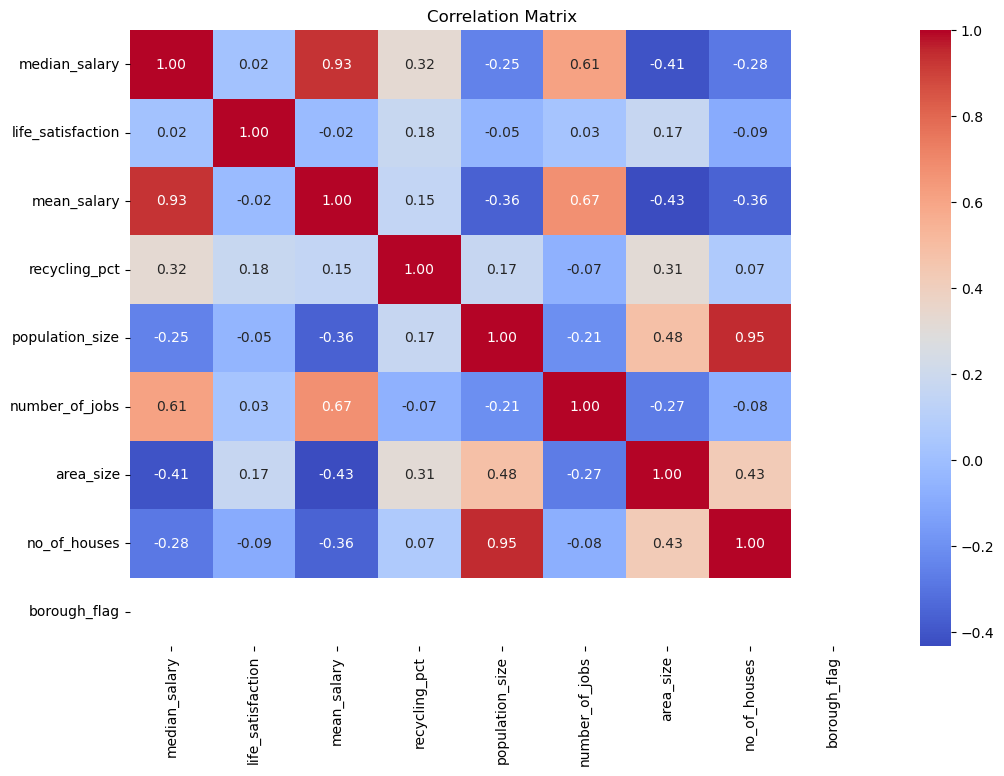

In [138]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Visualizing the Correlation Matrix
We visualize the correlation matrix using a heatmap, which highlights the strength and direction of correlations between numerical variables. The heatmap is annotated with correlation coefficients, and a `coolwarm` color scheme is used to distinguish positive and negative correlations.


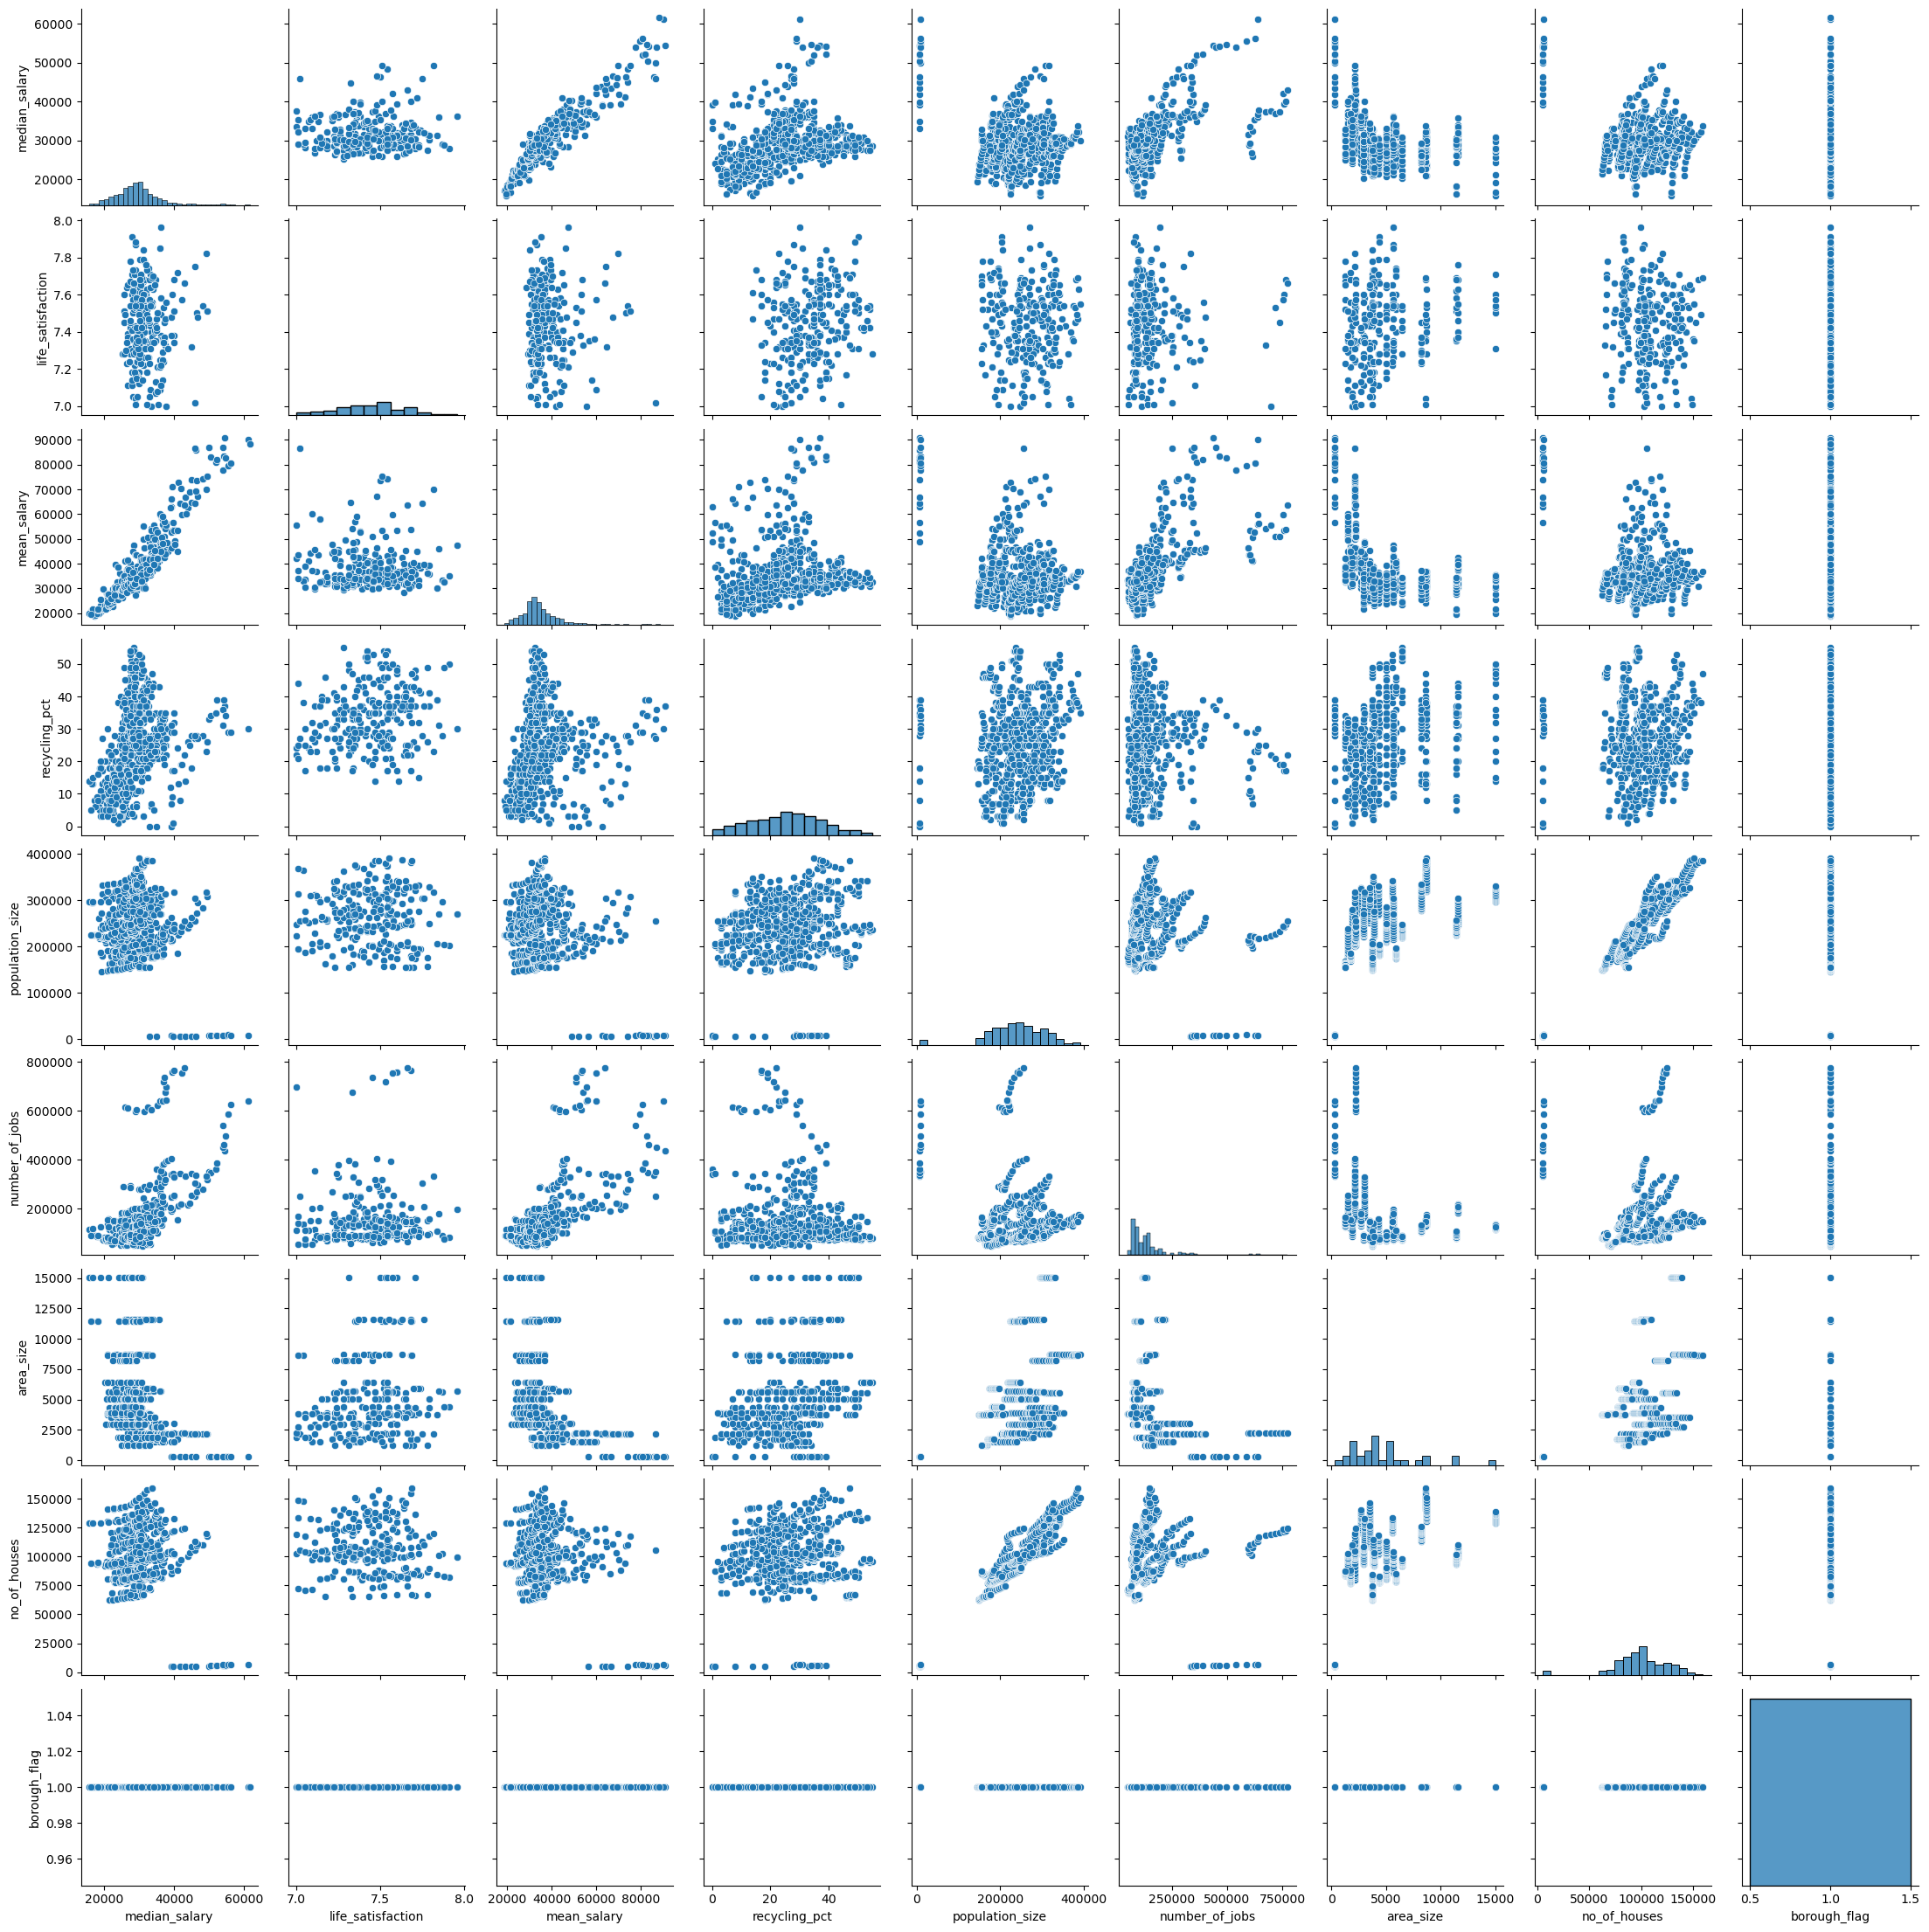

In [139]:
# Create a pairplot for numerical variables in the yearly dataset
sns.pairplot(yearly.select_dtypes(include=[np.number]))
plt.show()


## Handling Missing Values in the Yearly Dataset
In this section, we handle missing values in the `recycling_pct` and `life_satisfaction` columns of the `yearly` dataset using median imputation. For `recycling_pct`, we specifically focus on replacing zeros and NaNs with a more accurate median value that excludes zeros.


In [140]:
# Calculate the median of 'recycling_pct' excluding zeros for more accurate imputation
non_zero_median_recycling = yearly[yearly['recycling_pct'] != 0]['recycling_pct'].median()

# Replace zeros in 'recycling_pct' with the non-zero median
yearly['recycling_pct'] = yearly['recycling_pct'].replace(0, non_zero_median_recycling)

# Fill any remaining NaN values in 'recycling_pct' with the non-zero median
yearly['recycling_pct'].fillna(non_zero_median_recycling, inplace=True)


### Handling Missing Values in 'recycling_pct'
We address missing values in the `recycling_pct` column by first calculating the median recycling percentage, excluding zeros. Zeros are then replaced with this non-zero median to avoid skewing the data. Finally, any remaining NaN values are filled with the same median to ensure completeness.


In [141]:
# Median imputation for 'life_satisfaction'
yearly['life_satisfaction'].fillna(yearly['life_satisfaction'].median(), inplace=True)


### Median Imputation for 'life_satisfaction'
We handle missing values in the `life_satisfaction` column by imputing them with the median value of the column. This method is chosen to minimize the impact of outliers and provide a central tendency estimate for missing data.


## Filling Missing Values Using Linear Regression
In this section, we use linear regression to impute missing values in the `yearly` dataset. We predict missing values in certain columns based on their relationship with other relevant variables.


In [142]:
# Importing necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression


### Importing Necessary Libraries
We import Pandas for data manipulation and Scikit-learn's `LinearRegression` for performing linear regression to fill missing values.


In [143]:
# Function to ensure columns are numeric
def prepare_data(df, columns):
    for column in columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')


### Ensuring Columns Are Numeric
We define a function `prepare_data` to convert specified columns to numeric format. This step is crucial for ensuring that the data can be used in linear regression models without errors due to non-numeric entries.


In [144]:
# Function to perform linear regression and fill missing values
def fill_missing_with_regression(original_df, df, target, predictors):
    """
    This function uses linear regression to fill missing values in the target column 
    based on the predictor columns.
    """
    # Create masks to separate data for fitting and predicting
    mask_fit = df[target].notna() & df[predictors].notna().all(axis=1)
    mask_predict = df[target].isna() & df[predictors].notna().all(axis=1)
    
    if mask_fit.any():
        # Fit the linear regression model
        model = LinearRegression()
        model.fit(df.loc[mask_fit, predictors], df.loc[mask_fit, target])
        
        if mask_predict.any():
            # Predict and fill missing values
            df.loc[mask_predict, target] = model.predict(df.loc[mask_predict, predictors])
    
    # Merge the filled data back into the original dataframe
    original_df[target] = original_df[target].fillna(df[target])
    print(f"Missing '{target}' after imputation:", original_df[target].isna().sum())


### Performing Linear Regression for Imputation
We define a function `fill_missing_with_regression` that uses linear regression to fill missing values in a target column based on specified predictor columns. The function first fits the model using available data, then predicts and fills the missing values, and finally merges the filled data back into the original dataframe.


In [145]:
# Load the original data and create a working copy
original_yearly = yearly.copy()  # Keep a copy of the original dataframe


### Loading and Preparing the Data
We create a copy of the `yearly` dataframe named `original_yearly` to preserve the original data while working on a separate copy for the imputation process.


In [146]:
# Prepare and impute 'population_size' using 'area_size'
prepare_data(yearly, ['area_size'])
fill_missing_with_regression(original_yearly, yearly, 'population_size', ['area_size'])


Missing 'population_size' after imputation: 33


### Imputing 'population_size' Using 'area_size'
We impute missing values in the `population_size` column using linear regression, with `area_size` as the predictor. This approach leverages the relationship between area size and population size to fill missing data.


In [147]:
# Prepare and impute 'number_of_jobs' using 'median_salary' and 'mean_salary'
prepare_data(yearly, ['median_salary', 'mean_salary'])
fill_missing_with_regression(original_yearly, yearly, 'number_of_jobs', ['median_salary', 'mean_salary'])


Missing 'number_of_jobs' after imputation: 0


### Imputing 'number_of_jobs' Using 'median_salary' and 'mean_salary'
We impute missing values in the `number_of_jobs` column using linear regression, with `median_salary` and `mean_salary` as predictors. The relationship between salaries and the number of jobs is used to estimate the missing values.


In [148]:
# Prepare and impute 'area_size' using 'population_size' and 'no_of_houses'
prepare_data(yearly, ['population_size', 'no_of_houses'])
fill_missing_with_regression(original_yearly, yearly, 'area_size', ['population_size', 'no_of_houses'])


Missing 'area_size' after imputation: 99


### Imputing 'area_size' Using 'population_size' and 'no_of_houses'
We impute missing values in the `area_size` column using linear regression, with `population_size` and `no_of_houses` as predictors. This method uses the relationship between population, the number of houses, and area size to fill the missing data.


In [149]:
# Prepare and impute 'no_of_houses' using 'population_size' and 'area_size'
prepare_data(yearly, ['population_size', 'area_size'])
fill_missing_with_regression(original_yearly, yearly, 'no_of_houses', ['population_size', 'area_size'])


Missing 'no_of_houses' after imputation: 99


### Imputing 'no_of_houses' Using 'population_size' and 'area_size'
We impute missing values in the `no_of_houses` column using linear regression, with `population_size` and `area_size` as predictors. The model uses the relationship between population, area size, and the number of houses to estimate the missing values.


In [150]:
'''
# Save the filled dataframe
original_yearly.to_csv('updated_yearly.csv', index=False)
'''


"\n# Save the filled dataframe\noriginal_yearly.to_csv('updated_yearly.csv', index=False)\n"

## Combining Monthly and Yearly Datasets
In this section, we combine the processed monthly and yearly datasets by aggregating the monthly data and merging it with the yearly data. This combined dataset will facilitate a comprehensive analysis of housing data over different timeframes.


In [151]:
# Using the processed monthly dataset (miss_filled_monthly.csv)
monthly_data = monthly.copy()

# Using the processed yearly dataset (updated_yearly.csv)
yearly_data = yearly.copy()


### Using the Processed Monthly and Yearly Datasets
We utilize the `monthly` dataset (stored in `miss_filled_monthly.csv`) and the `yearly` dataset (stored in `updated_yearly.csv`) that have been previously processed. This avoids reloading data from external files, ensuring we work with the most recent and cleaned data.


In [152]:
# Convert date columns to datetime format
monthly_data['date'] = pd.to_datetime(monthly_data['date'], format='%d/%m/%Y')
yearly_data['date'] = pd.to_datetime(yearly_data['date'], format='%d/%m/%Y')


### Converting Date Columns to Datetime Format
We convert the `date` columns in both the `monthly` and `yearly` datasets to datetime format. This ensures that the dates are correctly interpreted, which is crucial for time-based operations and analysis.


In [153]:
# Extract year from the date in monthly data
monthly_data['year'] = monthly_data['date'].dt.year

# Extract year from the date in yearly data
yearly_data['year'] = yearly_data['date'].dt.year


### Extracting Year from Date
We extract the year from the `date` columns in both the `monthly` and `yearly` datasets. This allows us to aggregate and merge the data on a yearly basis, facilitating the combination of these datasets.


In [154]:
# Aggregate the monthly data by area and year
aggregated_monthly = monthly_data.groupby(['area', 'year']).agg({
    'average_price': 'mean',
    'houses_sold': 'sum',
    'no_of_crimes': 'sum'
}).reset_index()


### Aggregating the Monthly Data
We aggregate the `monthly` data by `area` and `year`, calculating the mean `average_price`, and summing `houses_sold` and `no_of_crimes`. This aggregation allows us to align the monthly data with the yearly data for merging.


In [155]:
# Merge the aggregated monthly data with the yearly data
combined_data = pd.merge(aggregated_monthly, yearly_data, on=['area', 'year'])


### Merging Aggregated Monthly Data with Yearly Data
We merge the aggregated `monthly` data with the `yearly` data based on `area` and `year`. This combined dataset provides a comprehensive view of the housing data, combining detailed monthly insights with broader yearly trends.


In [156]:
'''
# Save the combined dataset to a new CSV file
combined_data.to_csv('combined_data.csv', index=False)
'''


"\n# Save the combined dataset to a new CSV file\ncombined_data.to_csv('combined_data.csv', index=False)\n"

## Visualizing Outliers in Numerical Columns
In this section, we create boxplots for each numerical column in the combined dataset to identify potential outliers. Boxplots are effective tools for detecting outliers and understanding the distribution of data.


In [157]:
# Importing necessary libraries
import matplotlib.pyplot as plt


### Importing Necessary Libraries
We import Matplotlib's `pyplot` module to create boxplots for visualizing potential outliers in the numerical columns.


In [158]:
# List of numerical columns to visualize
numerical_cols = [
    'average_price', 'houses_sold', 'no_of_crimes', 'median_salary', 
    'mean_salary', 'recycling_pct', 'population_size', 'number_of_jobs', 
    'area_size', 'no_of_houses'
]


### Defining Numerical Columns for Visualization
We define a list of numerical columns from the combined dataset that we want to visualize using boxplots. These columns include key metrics such as `average_price`, `houses_sold`, `median_salary`, and others.


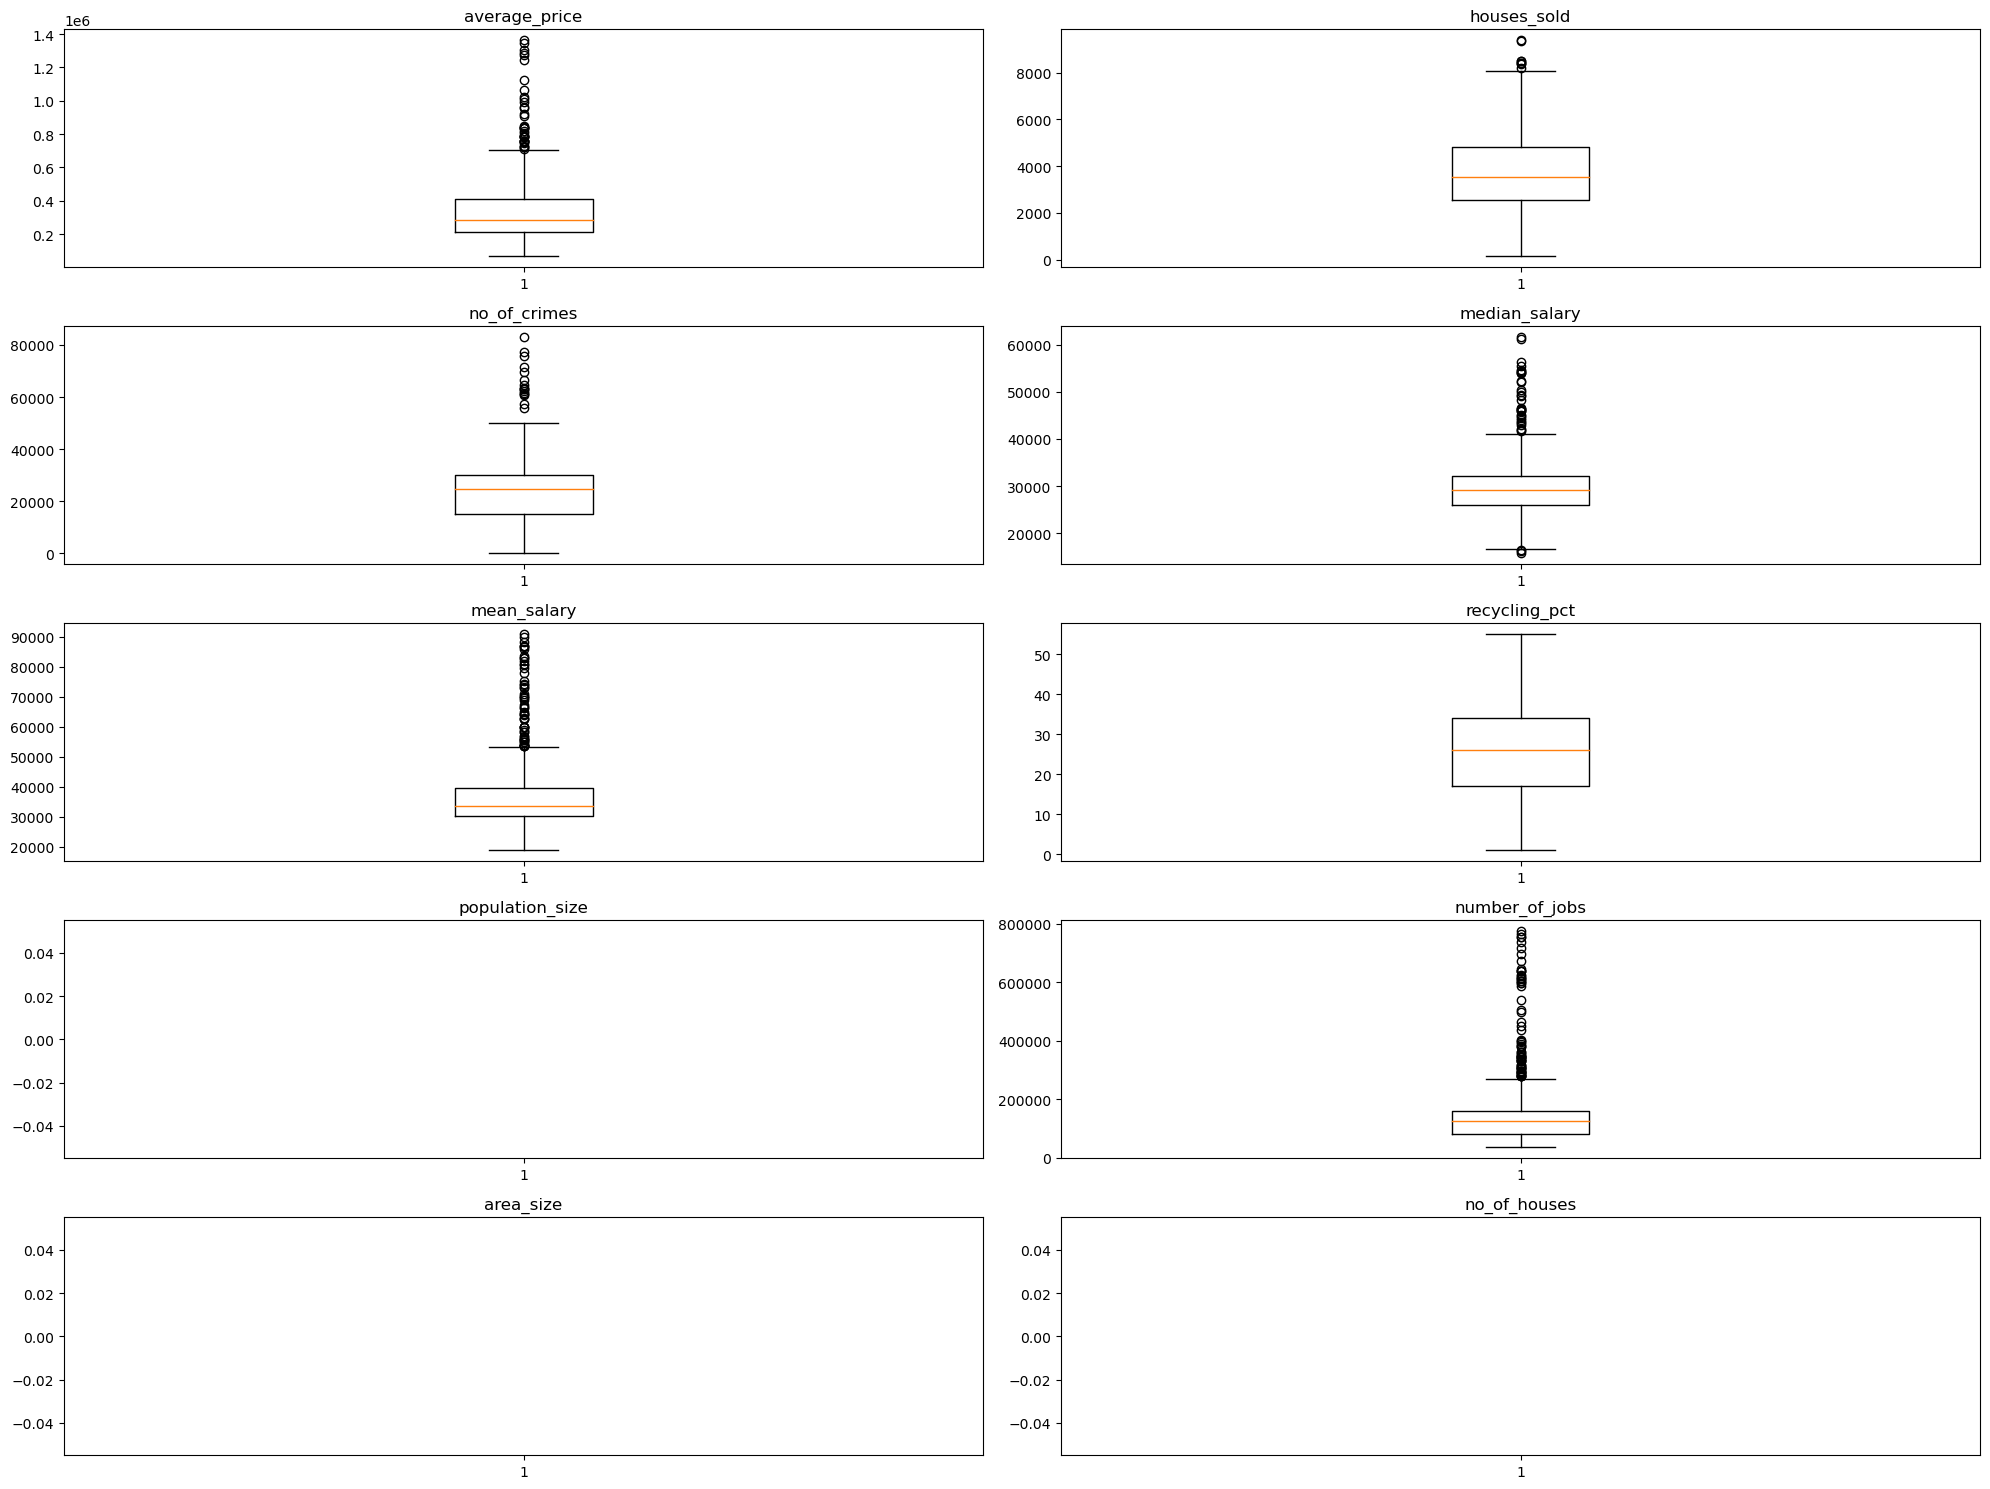

In [159]:
# Create boxplots for each numerical column
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 2, i)
    plt.boxplot(combined_data[col])
    plt.title(col)

# Adjust the layout for better spacing and display the plots
plt.tight_layout()
plt.show()


### Creating Boxplots to Identify Outliers
We create a series of boxplots, one for each numerical column in the `combined_data` dataset. Each boxplot is displayed in a subplot to visualize the distribution of data and identify any potential outliers. The `tight_layout()` function is used to ensure proper spacing between plots.


## Handling Outliers in Numerical Columns
In this section, we handle outliers in the numerical columns of the combined dataset using the Interquartile Range (IQR) method. Outliers are capped to the upper and lower bounds defined by the IQR to minimize their impact on further analysis.


In [160]:
# Importing necessary libraries
import numpy as np


### Importing Necessary Libraries
We import NumPy to perform numerical operations, particularly for calculating percentiles and applying transformations to handle outliers.


In [161]:
# Function to detect outliers using the Interquartile Range (IQR) method
def iqr_outliers(data):
    """
    This function calculates the lower and upper bounds for outliers using the IQR method.
    Data points outside these bounds are considered outliers.
    """
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound


### Detecting Outliers Using IQR
We define a function `iqr_outliers` that calculates the lower and upper bounds for detecting outliers using the Interquartile Range (IQR) method. Data points outside these bounds are considered outliers and will be capped.


In [162]:
# Capping outliers in each numerical column
for col in numerical_cols:
    lower_bound, upper_bound = iqr_outliers(combined_data[col])
    combined_data[col] = np.where(combined_data[col] > upper_bound, upper_bound, combined_data[col])
    combined_data[col] = np.where(combined_data[col] < lower_bound, lower_bound, combined_data[col])


### Capping Outliers in Numerical Columns
We iterate through each numerical column in the `combined_data` dataset and apply the `iqr_outliers` function to detect outliers. Outliers are then capped at the calculated lower and upper bounds to minimize their impact on further analysis.


In [163]:
# Save the dataset with outliers handled to a new CSV file
combined_data.to_csv('combined_data_with_outliers_handled.csv', index=False)


### Saving the Dataset with Outliers Handled
After handling the outliers in the numerical columns, we save the modified `combined_data` dataset to a new CSV file named `combined_data_with_outliers_handled.csv` for future analysis or use.
